# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
import numpy as np
import pandas as pd

! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

airbnb = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin-1')
airbnb.head()

Cloning into 'scratchpad'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 52 (delta 12), reused 7 (delta 7), pack-reused 34 (from 1)
Receiving objects: 100% (52/52), 730.42 KiB | 10.43 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Download complete
Extracting data files...
Data extracted


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [2]:
# 1 ) cleaning Price
airbnb.dtypes # price as object
airbnb['Price'].unique() # commas and stuff
airbnb['Price'] = airbnb['Price'].str.replace(',' , '')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

In [3]:
airbnb['Price'].unique() # commas gone
airbnb['Price'].describe()

airbnb['Price_NA'] = airbnb['Price'].isna()
airbnb['Price_NA'].value_counts() # there are no missing values?


,count
Price_NA,
False,30478


In [4]:
# 2 ) cleaning subject_injury
mn_police = pd.read_csv('/content/data/mn_police_use_of_force.csv')
mn_police.head()

mn_police['injury_na'] = mn_police['subject_injury'].isna()
mn_police['injury_na'].value_counts() # 9849 na=True
len(mn_police) # 9849 out of 12925 are missing



12925

In [5]:
pd.crosstab(mn_police['subject_injury'], mn_police['force_type'], dropna=True) # crosstab dropna


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [6]:
mn_police['subject_injury'] = mn_police['subject_injury'].fillna('Missing') # replacing NA with Missing
mn_police['subject_injury'].value_counts()


,count
subject_injury,
Missing,9848
Yes,1631
No,1446


In [7]:
pd.crosstab(mn_police['subject_injury'], mn_police['force_type']) # new crosstab with Missing
# it seems that bodily force is their preferred force type; a large proportion of the missing
# subject_injury cases involved bodily force, but the same goes for No/Yes as well

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [8]:
# 3 ) dummy var
metabric = pd.read_csv('/content/data/metabric.csv')

metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['0:LIVING'],1) # living = 1
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['1:DECEASED', 0]) # dead = 0
metabric.head()

/tmp/ipython-input-2298631483.py:5: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['1:DECEASED', 0]) # dead = 0


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1,YES,5.230071,31.0,4.0


In [9]:
# 4 ) missing values
airbnb['rating_na'] = airbnb['Review Scores Rating'].isna()
airbnb['rating_na'].value_counts() # 8323 missing ratings out of 30478
len(airbnb)

airbnb_med = airbnb['Review Scores Rating'].median() # median is 94
airbnb['Review Scores Rating'] = airbnb['Review Scores Rating'].fillna(airbnb_med) # na -> median
airbnb['Review Scores Rating'].value_counts()
# This might bias the results because a large amount of data has been replaced with the median
# This would be fine if a smaller proportion of the ratings were missing but a lot were

,count
Review Scores Rating,
94.0,9266
100.0,5594
90.0,1729
93.0,1614
80.0,1423
95.0,1295
96.0,1188
97.0,1033
92.0,875


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [11]:
# 1 ) opening file
shark_df = pd.read_excel('/content/GSAF5.xls')
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 2 ) drop col
shark_df.columns
shark_df = shark_df.drop(columns=['Unnamed: 21', 'Unnamed: 22'])

In [ ]:
# 3 )
# I would count an observation as a row with an available date/year and source.
# I think these are the most important pieces of information to verify that an attack
# actually happened. Having every piece of information is the best and the more the better,
# but I understand that not every observation will be complete.
# Where I draw the line will impact what rows are dropped, which will affect the analysis a great deal.
# Of course, I want to remove the less viable rows to make my analysis precise, but I don't want to
# remove too much either.

<Axes: >

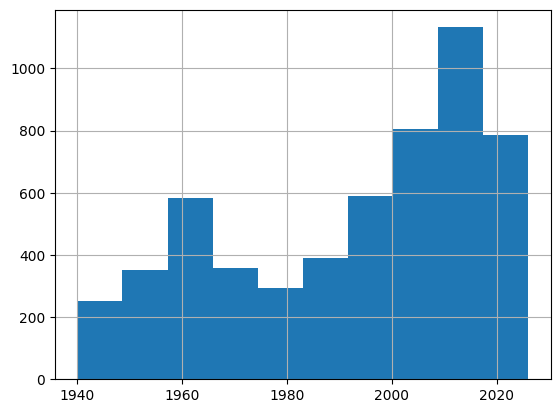

In [27]:
# 4 )
shark_df['Year'].unique() # .
shark_df.dtypes # year = float
shark_df['Year'].isna().value_counts() # year is missing for 2
shark_df['Year'].describe() # range: 0 to 2026

shark_df = shark_df.dropna(subset=['Year']) # dropping missing

# changing float to int
shark_df['Year'] = shark_df['Year'].astype(int)

shark_1940 = shark_df.loc[shark_df['Year'] >= 1940, :] # data from 1940 on

shark_1940['Year'].hist()
# shark attacks seem to have increased over time, but it is not a perfect positive linear trend

<Axes: >

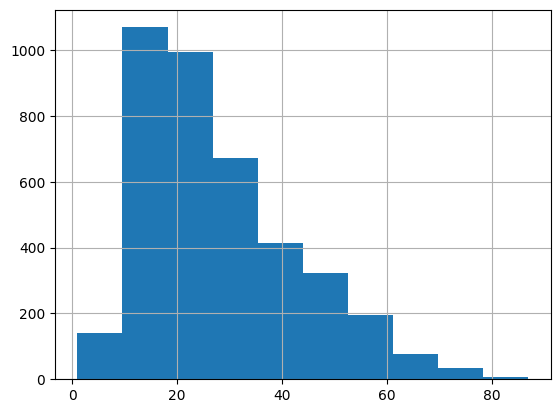

In [36]:
# 5 ) age
shark_df.dtypes # age is object :(
shark_df['Age'].unique() # wow ok... a lot going on here

shark_df['Age_new'] = pd.to_numeric(shark_df['Age'], errors='coerce')

shark_df['Age_new'].hist() # mostly teens and young adults

In [43]:
shark_df['Type'].value_counts()

,count
Type,
Unprovoked,5225
Provoked,644
Invalid,551
Watercraft,355
Sea Disaster,242
Questionable,26
Unknown,18
Boat,7
Unconfirmed,1


In [48]:
# 6 ) type
shark_df['Type'].unique()
shark_df['Type'].value_counts()

shark_df['Type']= shark_df['Type'].replace([' Provoked', 'Watercraft', 'Sea Disaster', 'Boat'], 'Provoked') # inclueded watercraft/boat/disaster because perhaps the shark was annoyed
shark_df['Type']= shark_df['Type'].replace(['unprovoked'], 'Unprovoked')
shark_df['Type']= shark_df['Type'].replace([np.nan, 'Questionable','Unverified','Under investigation', 'Invalid', '?', 'Unconfirmed'], 'Unknown')

shark_df['Type'].value_counts() # now only three types exist
# most attacks are unprovoked 5225/7072 (73.9%)


7072

In [52]:
# 7 ) fatal
shark_df['Fatal Y/N'].unique()

shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['n', 'Nq', ' N', 'N '], 'N')
shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['y', 'Y x 2'], 'Y')
shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['F', 'M', np.nan, 2017, 'UNKNOWN'], 'Unknown')

shark_df['Fatal Y/N'].value_counts() # now only three types exist


,count
Fatal Y/N,
N,4943
Y,1489
Unknown,640


In [55]:
# 8 )

pd.crosstab(shark_df['Type'], shark_df['Fatal Y/N'])
# more likely to be fatal when attack is unprovoked
# fatality ratio when provoked is roughly 1:5
# fatality ratio when unprovoked is roughly 1:3


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,1020,26,202
Unknown,43,536,20
Unprovoked,3880,78,1267


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?